<a href="https://colab.research.google.com/github/Nikund9/Artistic_Style_Transfer/blob/main/Artistic_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural style transfer
Neural style transfer employs an optimization method that merges two distinct images: a content image and a style reference image (e.g., an artwork created by a renowned painter). Through this technique, these images are combined to generate an output that resembles the content image while adopting the artistic style depicted in the style reference image.

In [ ]:

import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# VGG19 Model Initialization
Within this segment, we begin by setting up a VGG19 model integrated with pre-existing weights utilizing the torchvision library. Renowned for its prowess in image classification, VGG19 stands as a convolutional neural network. In this context, we focus on extracting its feature layers, which will be instrumental in facilitating subsequent steps in Neural Style Transfer.

In [ ]:
model = models.vgg19(pretrained = True).features

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

# Custom VGG Model and Image Loading
In this section, we craft a customized VGG model optimized for Neural Style Transfer (NST). This specialized model is designed to extract crucial features from particular layers (['0', '5', '10', '19', '28']) of a pre-trained VGG19 model. Additionally, a utility function named 'load_image' is created to streamline the process of loading and pre-processing images.

Our approach involves the removal of all fully connected dense layers present at the conclusion of VGG19, retaining solely the convolutional layers (Blocks 1 through 5). As per the paper's specifications, each convolutional block preceding a maxpool layer is grouped together, resulting in five distinct groups. We select the output from the convolutional layer just before each maxpool layer, denoted as layers '0', '5', '10', '19', and '28' respectively, aligning with the specified groupings in the paper.

In [ ]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.chosen_features = ['0','5','10','19','28']
        self.model = models.vgg19(pretrained = True).features[:29]
    def forward(self, x):
        features = []
        for layer_num, layer in enumerate(self.model):
            x = layer(x)
            if str(layer_num) in self.chosen_features:
                features.append(x)
        return features
def load_image(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device)
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
image_size = 356
loader = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ]
)

# Loading the Images
Load the base image and reference image where reference image is the image from where we will be taking the artistic style.

In [ ]:
base_image = load_image("base_image.jpg").to(device)
ref_image = load_image("reference_image.jpg").to(device)
model.to(device)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

# Base Image
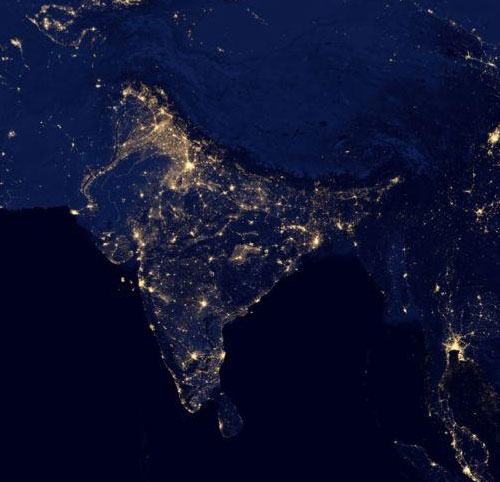

# Reference Image
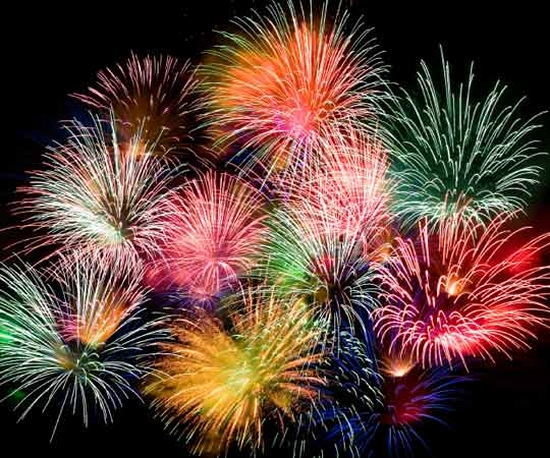

In [ ]:
# Initialize the generated image as a clone of the original image
generated = base_image.clone().requires_grad_(True)
# Load the VGG model for feature extraction and set it to evaluation mode
model = VGG().to(device).eval()

In [ ]:
# Set hyperparameters for the optimization process
total_steps = 4000
Alpha = 1
Beta = 0.06
optimizer = optim.Adam([generated], lr = 0.001)


# Optimization Loop
This code block defines the optimization loop for Neural Style Transfer. The generated image is iteratively updated to minimize the total loss, which is a combination of content and style losses.

In [ ]:
for step in range(total_steps):
# Obtain features from chosen layers for the generated, original, and style images
  generated_features = model(generated)
  base_image_features = model(base_image)
  ref_image_features = model(ref_image)
# Initialize style loss and original loss
  ref_loss = 0
  base_loss = 0
# Iterate through the features for chosen layers
  for gf, of, af in zip(generated_features,
                        base_image_features, ref_image_features):
# Calculate the mean squared error for original image and generated image features
    batchSize, channel, height, width = gf.shape
    base_loss += torch.mean((gf - of) ** 2)

# Compute Gram Matrix for generated and style images and calculate style loss
    g_l = gf.view(channel, height * width).mm(
        gf.view(channel, height*width).t()
    )
    a_l = af.view(channel, height*width).mm(
        af.view(channel, height*width).t()
    )
    ref_loss += torch.mean((g_l - a_l)**2)
  # Calculate total loss using the defined weights (alpha and beta)
  total_loss = Alpha * base_loss + Beta * ref_loss
  # Clear gradients, perform backpropagation, and update weights
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()
# Print total loss and save the generated image at certain intervals
  if step % 400 == 0:
    print(total_loss)
    save_image(generated, "generated.png")


tensor(10820871., device='cuda:0', grad_fn=<AddBackward0>)
tensor(614877.5000, device='cuda:0', grad_fn=<AddBackward0>)
tensor(325446.4688, device='cuda:0', grad_fn=<AddBackward0>)
tensor(205678.9062, device='cuda:0', grad_fn=<AddBackward0>)
tensor(139116.0625, device='cuda:0', grad_fn=<AddBackward0>)
tensor(100369.5312, device='cuda:0', grad_fn=<AddBackward0>)
tensor(77733.8984, device='cuda:0', grad_fn=<AddBackward0>)
tensor(64220.9766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(55629.7461, device='cuda:0', grad_fn=<AddBackward0>)
tensor(49542.5273, device='cuda:0', grad_fn=<AddBackward0>)
tensor(44844.1172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(40947.7031, device='cuda:0', grad_fn=<AddBackward0>)
tensor(37558.4883, device='cuda:0', grad_fn=<AddBackward0>)
tensor(34523.1445, device='cuda:0', grad_fn=<AddBackward0>)
tensor(31745.1445, device='cuda:0', grad_fn=<AddBackward0>)
tensor(29240.6816, device='cuda:0', grad_fn=<AddBackward0>)
tensor(27043.8711, device='cuda:0', 

# Generated_Image
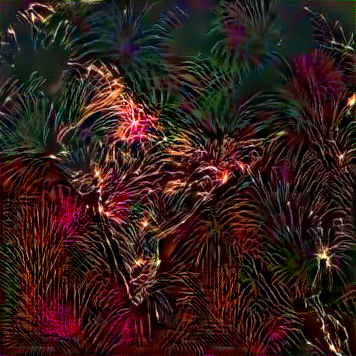